<a href="https://colab.research.google.com/github/ervianaa/naive-bayes-penjualan-rumah/blob/main/Tugaas3_LiaBektiE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
dataset = pd.read_csv("penjualan_rumah.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [99]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Kategori_Harga_Encoded'] = label_encoder.fit_transform(dataset['Kategori_Harga'])

In [103]:
# Pisahkan fitur dan label
X = dataset[['Luas_Bangunan', 'Jumlah_Kamar', 'Jumlah_Kamar_Mandi', 'Jarak_Ke_Pusat_Kota']]
y = dataset['Kategori_Harga_Encoded']

In [104]:
# Membagi dataset menjadi set training dan set testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [105]:
# Melakukan feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [106]:
# Membuat model Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [107]:
# Memprediksi hasil set testing
y_pred = classifier.predict(x_test)

In [109]:
# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

       Mahal       0.00      0.00      0.00        15
       Murah       0.33      0.17      0.22        12
      Sedang       0.38      0.78      0.51        18

    accuracy                           0.36        45
   macro avg       0.24      0.31      0.24        45
weighted avg       0.24      0.36      0.26        45



In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  2 13]
 [ 0  2 10]
 [ 2  2 14]]


<ipython-input-118-0f97f51e6996>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kategori_Harga', data=dataset, palette='Set2')


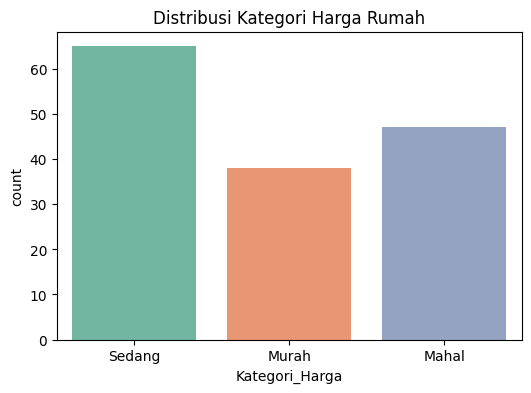

In [118]:
# Visualisasi Sebaran Kategori Harga
plt.figure(figsize=(6,4))
sns.countplot(x='Kategori_Harga', data=dataset, palette='Set2')
plt.title('Distribusi Kategori Harga Rumah')
plt.show()

<ipython-input-128-6fb9cb1b112a>:2: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


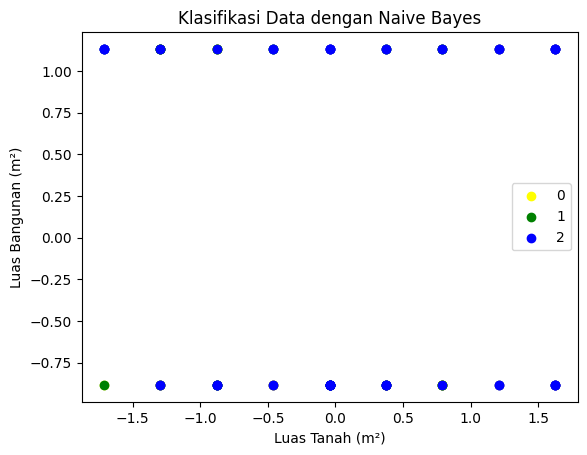

In [128]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('yellow', 'green', 'blue'))(i), label=j)

plt.title('Klasifikasi Data dengan Naive Bayes')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Luas Bangunan (m²)')
plt.legend()
plt.show()